In [3]:
!pip install --upgrade numpy==1.24.3
!pip install --upgrade pandas==2.2.0
!pip install --upgrade scikit-learn==1.4.1.post1

  Using cached numpy-1.24.3.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Preston\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\Preston\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\req_command.py", line 245, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Preston\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\commands\install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "C:\Users\Preston\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "C:\Users\Preston\AppData\Local\Programs\Python\Python31

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('insurance1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1338 non-null   int64  
 1   sex                  1338 non-null   int64  
 2   bmi                  1338 non-null   float64
 3   children             1338 non-null   int64  
 4   smoker               1338 non-null   int64  
 5   charges              1338 non-null   float64
 6   avg_steps_per_day    1338 non-null   int64  
 7   gym_frequency        1338 non-null   int64  
 8   time_spent_in_gym    1338 non-null   int64  
 9   region_northeast     1338 non-null   bool   
 10  region_northwest     1338 non-null   bool   
 11  region_southeast     1338 non-null   bool   
 12  region_southwest     1338 non-null   bool   
 13  occupation_Artist    1338 non-null   bool   
 14  occupation_Doctor    1338 non-null   bool   
 15  occupation_Engineer  1338 non-null   b

C:\Users\Preston\AppData\Local\Temp\ipykernel_6580\3368616491.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
#Question 1
((df.isnull().sum().sum()) / ((df.isnull().sum().sum()+ df.notnull().sum().sum()))) * 100

0.0

In [53]:
#Question 2
df['age'].replace(-1, np.nan, inplace = True)

C:\Users\Preston\AppData\Local\Temp\ipykernel_20732\3831255451.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(-1, np.nan, inplace = True)


In [12]:
#Question 3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1204 non-null   float64
 1   sex                1338 non-null   object 
 2   bmi                1220 non-null   float64
 3   children           1177 non-null   float64
 4   smoker             1203 non-null   object 
 5   region             1210 non-null   object 
 6   charges            1338 non-null   float64
 7   occupation         1221 non-null   object 
 8   avg_steps_per_day  1193 non-null   float64
 9   gym_frequency      1207 non-null   object 
 10  time_spent_in_gym  1338 non-null   int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 115.1+ KB


In [15]:
group_gym = df.groupby('gym_frequency').mean('age')
print(group_gym)

                             age        bmi  children       charges  \
gym_frequency                                                         
1 or 2 days a week     40.043011  31.229922  0.973118  16972.453223   
3 to 5 days of a week  37.988060  30.464559  1.067692  11933.478148   
everyday               37.755556  30.348740  1.217143  11182.897964   
never                  43.485437  31.101716  1.174129  17498.972240   

                       avg_steps_per_day  time_spent_in_gym  
gym_frequency                                                
1 or 2 days a week           7649.214660          40.745192  
3 to 5 days of a week        7965.178571          41.829268  
everyday                     7932.471264          41.529851  
never                        7475.609756           0.000000  


In [16]:
#Question 4
df.loc[(df['gym_frequency']=='1 or 2 days a week') & (df['age'].isnull()), 'age'] = 40
df.loc[(df['gym_frequency']=='3 to 5 days of a week') & (df['age'].isnull()), 'age'] = 38
df.loc[(df['gym_frequency']=='everyday') & (df['age'].isnull()), 'age'] = 38
df.loc[(df['gym_frequency']=='never') & (df['age'].isnull()), 'age'] = 43
df['age'].isnull().sum()
df['age'].mean()

39.20921450151057

In [17]:
#Question 5 
df['age'] = df['age'].fillna(df['age'].median())
df['age'].mean()

39.20702541106129

In [18]:
#Question 6
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [19]:
df['sex'] = df['sex'].map({'female':0,'male':1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1338 non-null   float64
 1   sex                1338 non-null   int64  
 2   bmi                1220 non-null   float64
 3   children           1177 non-null   float64
 4   smoker             1203 non-null   object 
 5   region             1210 non-null   object 
 6   charges            1338 non-null   float64
 7   occupation         1221 non-null   object 
 8   avg_steps_per_day  1193 non-null   float64
 9   gym_frequency      1207 non-null   object 
 10  time_spent_in_gym  1338 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 115.1+ KB


In [20]:
#Question 7
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1338 non-null   float64
 1   sex                1338 non-null   int64  
 2   bmi                1338 non-null   float64
 3   children           1177 non-null   float64
 4   smoker             1203 non-null   object 
 5   region             1210 non-null   object 
 6   charges            1338 non-null   float64
 7   occupation         1221 non-null   object 
 8   avg_steps_per_day  1193 non-null   float64
 9   gym_frequency      1207 non-null   object 
 10  time_spent_in_gym  1338 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 115.1+ KB


In [21]:
#Question 8
df['children'].value_counts() / df['children'].value_counts().sum()
np.random.seed(0)
values = np.random.choice([0, 1, 2, 3, 4, 5], 
                          size=df['children'].isnull().sum(), 
                          p=[0.418862, 0.244690, 0.180119, 0.121495, 0.020390, 0.014444])
df.loc[(df['children'].isnull()), 'children'] = values
df['children'].value_counts()

children
0.0    553
1.0    337
2.0    241
3.0    161
4.0     27
5.0     19
Name: count, dtype: int64

In [22]:
df['children'].isnull().sum()

0

In [23]:
#Question 9
df['smoker'] = df['smoker'].fillna('no')
df['smoker'] = df['smoker'].map({'yes':0,'no':1})
df['smoker'].value_counts()

smoker
1    1098
0     240
Name: count, dtype: int64

In [24]:
#Question 10, similar to question 8
df['region'].value_counts() / df['region'].value_counts().sum()

region
southeast    0.272727
southwest    0.243802
northwest    0.242149
northeast    0.241322
Name: count, dtype: float64

In [25]:
np.random.seed(0)
values_region = np.random.choice(('southeast','southwest','northwest','northeast'), 
                          size=df['region'].isnull().sum(), 
                          p=[0.272727, 0.243802, 0.242149, 0.241322])
df.loc[(df['region'].isnull()), 'region'] = values_region
df['region'].value_counts()

region
southeast    365
northwest    333
southwest    321
northeast    319
Name: count, dtype: int64

In [26]:
#Question 11, dependent on question 10
cols = pd.get_dummies(df['region'],prefix = 'region')
df[cols.columns] = cols
df.drop('region', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1338 non-null   float64
 1   sex                1338 non-null   int64  
 2   bmi                1338 non-null   float64
 3   children           1338 non-null   float64
 4   smoker             1338 non-null   int64  
 5   charges            1338 non-null   float64
 6   occupation         1221 non-null   object 
 7   avg_steps_per_day  1193 non-null   float64
 8   gym_frequency      1207 non-null   object 
 9   time_spent_in_gym  1338 non-null   int64  
 10  region_northeast   1338 non-null   bool   
 11  region_northwest   1338 non-null   bool   
 12  region_southeast   1338 non-null   bool   
 13  region_southwest   1338 non-null   bool   
dtypes: bool(4), float64(5), int64(3), object(2)
memory usage: 109.9+ KB


In [27]:
#Question 12
df.fillna({'occupation':'Other'}, inplace = True)
df['occupation'].value_counts()

occupation
Other       359
Artist      257
Engineer    256
Doctor      235
Teacher     231
Name: count, dtype: int64

In [30]:
#Question 13
pd.crosstab(df['occupation'],df['gym_frequency'])

gym_frequency,1 or 2 days a week,3 to 5 days of a week,everyday,never
occupation,,,,
Artist,44,61,84,38
Doctor,44,61,69,44
Engineer,34,77,75,46
Other,55,93,113,61
Teacher,31,77,61,39


In [31]:
df.loc[(df['occupation']=='Artist') & (df['gym_frequency'].isna()), 'gym_frequency'] = 'everyday'
df.loc[(df['occupation']=='Doctor') & (df['gym_frequency'].isna()), 'gym_frequency'] = 'everyday'
df.loc[(df['occupation']=='Engineer') & (df['gym_frequency'].isna()), 'gym_frequency'] = '3 to 5 days of a week'
df.loc[(df['occupation']=='Other') & (df['gym_frequency'].isna()), 'gym_frequency'] = 'everyday'
df.loc[(df['occupation']=='Teacher') & (df['gym_frequency'].isna()), 'gym_frequency'] = '3 to 5 days of a week'
df['gym_frequency'].value_counts()

gym_frequency
everyday                 486
3 to 5 days of a week    416
never                    228
1 or 2 days a week       208
Name: count, dtype: int64

In [32]:
#Question 14
df['gym_frequency'] = df['gym_frequency'].map({'never' : 0, '1 or 2 days a week': 1, '3 to 5 days of a week': 2, 'everyday': 3})
df.head()

,age,sex,bmi,children,smoker,charges,occupation,avg_steps_per_day,gym_frequency,time_spent_in_gym,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0,27.900,0.0,0,16884.92400,Other,NaN,1,45,False,False,False,True
1,18.0,1,30.495,1.0,1,1725.55230,Engineer,8900.0,2,30,False,False,True,False
2,28.0,1,33.000,3.0,1,4449.46200,Artist,8900.0,3,45,False,True,False,False
3,33.0,1,22.705,0.0,1,21984.47061,Artist,7900.0,1,60,False,True,False,False
4,32.0,1,28.880,0.0,1,3866.85520,Artist,NaN,2,60,False,True,False,False


In [33]:
#Question 15
cols = pd.get_dummies(df['occupation'],prefix = 'occupation')
df[cols.columns] = cols
df.drop('occupation', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1338 non-null   float64
 1   sex                  1338 non-null   int64  
 2   bmi                  1338 non-null   float64
 3   children             1338 non-null   float64
 4   smoker               1338 non-null   int64  
 5   charges              1338 non-null   float64
 6   avg_steps_per_day    1193 non-null   float64
 7   gym_frequency        1338 non-null   int64  
 8   time_spent_in_gym    1338 non-null   int64  
 9   region_northeast     1338 non-null   bool   
 10  region_northwest     1338 non-null   bool   
 11  region_southeast     1338 non-null   bool   
 12  region_southwest     1338 non-null   bool   
 13  occupation_Artist    1338 non-null   bool   
 14  occupation_Doctor    1338 non-null   bool   
 15  occupation_Engineer  1338 non-null   b

In [36]:
#Question 16. get the averages of each age group
avg_steps_10_to_19 = df.loc[(df['age']<20)]
avg_steps_20_to_29 = df.loc[(df['age']>=20) & (df['age']<30)]
avg_steps_30_to_39 = df.loc[(df['age']>=30) & (df['age']<40)]
avg_steps_40_to_49 = df.loc[(df['age']>=40) & (df['age']<50)]
avg_steps_50_to_59 = df.loc[(df['age']>=50) & (df['age']<60)]
avg_steps_60_to_69 = df.loc[(df['age']>=60) & (df['age']<70)]

print([avg_steps_10_to_19['avg_steps_per_day'].median(),
avg_steps_20_to_29['avg_steps_per_day'].median(),
avg_steps_30_to_39['avg_steps_per_day'].median(),
avg_steps_40_to_49['avg_steps_per_day'].median(),
avg_steps_50_to_59['avg_steps_per_day'].median(),
avg_steps_60_to_69['avg_steps_per_day'].median()])

[8900.0, 9000.0, 8500.0, 7500.0, 6500.0, 5800.0]


In [37]:
#apply means to the null vaules and return the mean of 'avg_steps_per_day'
df.loc[(df['age']<20.0) & (df['avg_steps_per_day'].isnull()),'avg_steps_per_day'] = 8900
df.loc[(df['age']>=20) & (df['age']<30) & (df['avg_steps_per_day'].isnull()),'avg_steps_per_day'] = 9000
df.loc[(df['age']>=30) & (df['age']<40)& (df['avg_steps_per_day'].isnull()),'avg_steps_per_day'] = 8500
df.loc[(df['age']>=40) & (df['age']<50)& (df['avg_steps_per_day'].isnull()),'avg_steps_per_day'] = 7500
df.loc[(df['age']>=50) & (df['age']<60)& (df['avg_steps_per_day'].isnull()),'avg_steps_per_day'] = 6500
df.loc[(df['age']>=60) & (df['age']<70)& (df['avg_steps_per_day'].isnull()),'avg_steps_per_day'] = 5800
df['avg_steps_per_day'].mean()

7843.348281016442

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1338 non-null   int64  
 1   sex                  1338 non-null   int64  
 2   bmi                  1338 non-null   float64
 3   children             1338 non-null   int64  
 4   smoker               1338 non-null   int64  
 5   charges              1338 non-null   float64
 6   avg_steps_per_day    1338 non-null   int64  
 7   gym_frequency        1338 non-null   int64  
 8   time_spent_in_gym    1338 non-null   int64  
 9   region_northeast     1338 non-null   bool   
 10  region_northwest     1338 non-null   bool   
 11  region_southeast     1338 non-null   bool   
 12  region_southwest     1338 non-null   bool   
 13  occupation_Artist    1338 non-null   bool   
 14  occupation_Doctor    1338 non-null   bool   
 15  occupation_Engineer  1338 non-null   b

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.cluster

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

In [44]:
#Lab2 Question 1
X = df.drop('charges', axis = 1)
Y = df['charges']
X['age'].median()

39.0

In [45]:
#Question 2
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [46]:
X_scaled

,age,sex,bmi,children,smoker,avg_steps_per_day,gym_frequency,time_spent_in_gym,region_northeast,region_northwest,region_southeast,region_southwest,occupation_Artist,occupation_Doctor,occupation_Engineer,occupation_Other,occupation_Teacher
0,0.021739,0.0,0.321227,0.0,0.0,0.678161,0.333333,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,1.0,0.391041,0.2,1.0,0.678161,0.666667,0.50,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.217391,1.0,0.458434,0.6,1.0,0.678161,1.000000,0.75,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.326087,1.0,0.181464,0.0,1.0,0.563218,0.333333,1.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.304348,1.0,0.347592,0.0,1.0,0.632184,0.666667,1.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,1.0,0.403820,0.6,1.0,0.505747,0.666667,0.50,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1334,0.000000,0.0,0.429379,0.0,1.0,0.632184,1.000000,0.75,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1335,0.456522,0.0,0.562012,0.0,1.0,0.632184,0.666667,0.75,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1336,0.065217,0.0,0.264730,0.0,1.0,0.919540,0.333333,0.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [47]:
X_scaled['age'].median()

0.4565217391304348

In [48]:
#Question 3
from sklearn.cluster import AgglomerativeClustering
#model is set with default values, 
model = AgglomerativeClustering(distance_threshold = 22, n_clusters = None, linkage = 'ward')
model = model.fit(X_scaled)

In [49]:
model.n_clusters_

4

In [50]:
#Question 4
cluster_size = pd.DataFrame((model.labels_), columns = ['a'])
cluster_size['a'].value_counts()

a
0    466
1    359
2    257
3    256
Name: count, dtype: int64

In [51]:
#Question 5, scale DF back to original data and arrange based on clusters with the lowest to highest avg age
X_scaledback = scaler.inverse_transform(X_scaled)
print(X_scaledback)

[[19.     0.    27.9   ...  0.     1.     0.   ]
 [18.     1.    30.495 ...  1.     0.     0.   ]
 [28.     1.    33.    ...  0.     0.     0.   ]
 ...
 [39.     0.    36.85  ...  1.     0.     0.   ]
 [21.     0.    25.8   ...  0.     0.     1.   ]
 [61.     0.    29.07  ...  1.     0.     0.   ]]


In [52]:
df.insert(0, "Cluster", model.labels_, True)

In [53]:
clustered_group_mean = df.groupby('Cluster').mean()
print(clustered_group_mean['age'])

Cluster
0    39.950644
1    39.075209
2    39.529183
3    37.714844
Name: age, dtype: float64


In [54]:
#Question 6
clustered_group_median = df.groupby('Cluster').median()
print(clustered_group_median['avg_steps_per_day'])

Cluster
0    8000.0
1    7900.0
2    7800.0
3    8100.0
Name: avg_steps_per_day, dtype: float64


In [55]:
#question 7, cluster 1 analysis 
cluster_1_group = df.loc[(df['Cluster']==1)]
clustered_group = df.groupby('Cluster')
#part1, no
print(cluster_1_group['smoker'].value_counts())
#part2, no
print(clustered_group['region_southeast'].value_counts())
#part3, no
print(cluster_1_group['sex'].value_counts())
#part4, no
print(clustered_group['region_northeast'].value_counts())
#part5, no
print(clustered_group['age'])
#part6, yes
print(cluster_1_group['occupation_Engineer'].value_counts())
#part7, yes, review part4 readout
#part8, yes, review part2 readout

smoker
1    302
0     57
Name: count, dtype: int64
Cluster  region_southeast
0        False               343
         True                123
1        False               247
         True                112
2        False               190
         True                 67
3        False               193
         True                 63
Name: count, dtype: int64
sex
1    186
0    173
Name: count, dtype: int64
Cluster  region_northeast
0        False               355
         True                111
1        False               285
         True                 74
2        False               189
         True                 68
3        False               190
         True                 66
Name: count, dtype: int64
occupation_Engineer
False    359
Name: count, dtype: int64


In [56]:
#Question 8 cluster 2 analysis
cluster_2_group = df.loc[(df['Cluster']==2)]
#part1, no
print(cluster_2_group['occupation_Engineer'].value_counts())
#part2, no
print(clustered_group_mean['gym_frequency'])
print(clustered_group_mean['time_spent_in_gym'])
#part3, no
print(cluster_2_group['occupation_Doctor'].value_counts())
print(cluster_2_group['occupation_Teacher'].value_counts())
#part4, no, review mean age
#part5, no
print(cluster_2_group['sex'].value_counts())
#part6, yes, view part2

occupation_Engineer
False    257
Name: count, dtype: int64
Cluster
0    1.798283
1    1.924791
2    1.976654
3    1.800781
Name: gym_frequency, dtype: float64
Cluster
0    33.090129
1    34.136490
2    34.494163
3    31.640625
Name: time_spent_in_gym, dtype: float64
occupation_Doctor
False    257
Name: count, dtype: int64
occupation_Teacher
False    257
Name: count, dtype: int64
sex
1    135
0    122
Name: count, dtype: int64


In [36]:
#Question 9, cluster 3 analysis 
cluster_3_group = df.loc[(df['Cluster']==3)]
#part1, no
print(clustered_group_mean['time_spent_in_gym'])
#part2, no
print(cluster_3_group['occupation_Artist'].value_counts())
#part3, no
print(clustered_group['smoker'].value_counts())
#part4, no
print(cluster_3_group['region_northwest'].value_counts())

Cluster
0    33.090129
1    34.136490
2    34.494163
3    31.640625
Name: time_spent_in_gym, dtype: float64
occupation_Artist
False    256
Name: count, dtype: int64
Cluster  smoker
0        1         382
         0          84
1        1         302
         0          57
2        1         204
         0          53
3        1         210
         0          46
Name: count, dtype: int64
region_northwest
False    195
True      61
Name: count, dtype: int64


In [37]:
#Question 10, instances of zero children
cluster_group_children = df.groupby('Cluster')
print(cluster_group_children['children'].value_counts())

Cluster  children
0        0           203
         1           118
         2            76
         3            56
         4             8
         5             5
1        0           151
         1            91
         2            58
         3            46
         4             8
         5             5
2        0            91
         1            68
         2            51
         3            36
         4             7
         5             4
3        0           108
         1            60
         2            56
         3            23
         5             5
         4             4
Name: count, dtype: int64


In [57]:
#Question 11, Kmeans model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

kmeans_insurance = KMeans(n_clusters= 4, random_state= 0, n_init = 'auto')
kmeans_insurance.fit(X_scaled)

labels_kmeans = kmeans_insurance.labels_

In [58]:
X['k-means']=kmeans_insurance.labels_
X.head()

,age,sex,bmi,children,smoker,avg_steps_per_day,gym_frequency,time_spent_in_gym,region_northeast,region_northwest,region_southeast,region_southwest,occupation_Artist,occupation_Doctor,occupation_Engineer,occupation_Other,occupation_Teacher,k-means
0,19,0,27.900,0,0,8900,1,45,False,False,False,True,False,False,False,True,False,0
1,18,1,30.495,1,1,8900,2,30,False,False,True,False,False,False,True,False,False,2
2,28,1,33.000,3,1,8900,3,45,False,True,False,False,True,False,False,False,False,1
3,33,1,22.705,0,1,7900,1,60,False,True,False,False,True,False,False,False,False,1
4,32,1,28.880,0,1,8500,2,60,False,True,False,False,True,False,False,False,False,1


In [59]:
X['k-means'].value_counts()

k-means
2    365
1    326
3    326
0    321
Name: count, dtype: int64

In [60]:
#Question12, Cluster 0
cluster_0_group_k_means = X.loc[(X['k-means']==0)]
#part1, yes
cluster_0_group_k_means['sex'].value_counts()

sex
0    162
1    159
Name: count, dtype: int64

In [61]:
#part2, no
cluster_0_group_k_means['time_spent_in_gym'].value_counts()

time_spent_in_gym
60    81
45    76
30    72
0     55
15    37
Name: count, dtype: int64

In [62]:
#part3, 
X.groupby('k-means').mean()

,age,sex,bmi,children,smoker,avg_steps_per_day,gym_frequency,time_spent_in_gym,region_northeast,region_northwest,region_southeast,region_southwest,occupation_Artist,occupation_Doctor,occupation_Engineer,occupation_Other,occupation_Teacher
k-means,,,,,,,,,,,,,,,,,
0,39.950156,0.495327,30.601106,1.112150,0.847352,7808.411215,1.897196,34.252336,0.000000,0.000000,0.0,1.0,0.177570,0.190031,0.205607,0.255452,0.171340
1,38.368098,1.000000,29.499479,1.187117,0.809816,7914.723926,1.886503,33.358896,0.478528,0.521472,0.0,0.0,0.211656,0.138037,0.199387,0.279141,0.171779
2,39.049315,0.523288,32.902068,1.104110,0.791781,7864.383562,1.879452,33.863014,0.000000,0.000000,1.0,0.0,0.183562,0.180822,0.172603,0.306849,0.156164
3,39.490798,0.000000,29.551994,1.098160,0.837423,7782.822086,1.803681,31.932515,0.500000,0.500000,0.0,0.0,0.196319,0.193252,0.190184,0.226994,0.193252


In [63]:
#part4, no
smoker_values = X.groupby('k-means').value_counts(['smoker'])
print(smoker_values)

k-means  smoker
0        1         272
         0          49
1        1         264
         0          62
2        1         289
         0          76
3        1         273
         0          53
Name: count, dtype: int64


In [64]:
#part5, yes 2=3-5 3=everyday
cluster_0_group_k_means['gym_frequency'].value_counts()

gym_frequency
3    117
2    103
1     52
0     49
Name: count, dtype: int64

In [65]:
#part6, no
X.groupby('k-means').mean()

,age,sex,bmi,children,smoker,avg_steps_per_day,gym_frequency,time_spent_in_gym,region_northeast,region_northwest,region_southeast,region_southwest,occupation_Artist,occupation_Doctor,occupation_Engineer,occupation_Other,occupation_Teacher
k-means,,,,,,,,,,,,,,,,,
0,39.950156,0.495327,30.601106,1.112150,0.847352,7808.411215,1.897196,34.252336,0.000000,0.000000,0.0,1.0,0.177570,0.190031,0.205607,0.255452,0.171340
1,38.368098,1.000000,29.499479,1.187117,0.809816,7914.723926,1.886503,33.358896,0.478528,0.521472,0.0,0.0,0.211656,0.138037,0.199387,0.279141,0.171779
2,39.049315,0.523288,32.902068,1.104110,0.791781,7864.383562,1.879452,33.863014,0.000000,0.000000,1.0,0.0,0.183562,0.180822,0.172603,0.306849,0.156164
3,39.490798,0.000000,29.551994,1.098160,0.837423,7782.822086,1.803681,31.932515,0.500000,0.500000,0.0,0.0,0.196319,0.193252,0.190184,0.226994,0.193252


In [66]:
#part7, no
cluster_0_group_k_means['region_northeast'].value_counts()

region_northeast
False    321
Name: count, dtype: int64

In [67]:
#Question 13
X.groupby('k-means').value_counts(['children'])

k-means  children
0        0           139
         1            78
         2            55
         3            35
         5             8
         4             6
1        0           126
         1            82
         2            65
         3            40
         4            10
         5             3
2        0           149
         1           100
         2            62
         3            43
         5             6
         4             5
3        0           139
         1            77
         2            59
         3            43
         4             6
         5             2
Name: count, dtype: int64

In [68]:
#Question14, cluster 1
cluster_1_group_k_means = X.loc[(X['k-means']==1)]
#part1, no
X.groupby('k-means').mean()
#part2, no, review part 1 readout

,age,sex,bmi,children,smoker,avg_steps_per_day,gym_frequency,time_spent_in_gym,region_northeast,region_northwest,region_southeast,region_southwest,occupation_Artist,occupation_Doctor,occupation_Engineer,occupation_Other,occupation_Teacher
k-means,,,,,,,,,,,,,,,,,
0,39.950156,0.495327,30.601106,1.112150,0.847352,7808.411215,1.897196,34.252336,0.000000,0.000000,0.0,1.0,0.177570,0.190031,0.205607,0.255452,0.171340
1,38.368098,1.000000,29.499479,1.187117,0.809816,7914.723926,1.886503,33.358896,0.478528,0.521472,0.0,0.0,0.211656,0.138037,0.199387,0.279141,0.171779
2,39.049315,0.523288,32.902068,1.104110,0.791781,7864.383562,1.879452,33.863014,0.000000,0.000000,1.0,0.0,0.183562,0.180822,0.172603,0.306849,0.156164
3,39.490798,0.000000,29.551994,1.098160,0.837423,7782.822086,1.803681,31.932515,0.500000,0.500000,0.0,0.0,0.196319,0.193252,0.190184,0.226994,0.193252


In [69]:
#part3, yes
cluster_1_group_k_means['sex'].value_counts()

sex
1    326
Name: count, dtype: int64

In [ ]:
#part4, no, part1 readout

In [70]:
#part5, yes
cluster_1_group_k_means.mean()
#part6, no, part5 readout

age                      38.368098
sex                       1.000000
bmi                      29.499479
children                  1.187117
smoker                    0.809816
avg_steps_per_day      7914.723926
gym_frequency             1.886503
time_spent_in_gym        33.358896
region_northeast          0.478528
region_northwest          0.521472
region_southeast          0.000000
region_southwest          0.000000
occupation_Artist         0.211656
occupation_Doctor         0.138037
occupation_Engineer       0.199387
occupation_Other          0.279141
occupation_Teacher        0.171779
k-means                   1.000000
dtype: float64

In [71]:
#part7, no
cluster_1_group_k_means['time_spent_in_gym'].value_counts()

time_spent_in_gym
30    79
45    78
60    75
0     61
15    33
Name: count, dtype: int64

In [72]:
#question15 cluster 2
cluster_2_group_k_means = X.loc[(X['k-means']==2)]
#part1, no
cluster_2_group_k_means['time_spent_in_gym'].value_counts()

time_spent_in_gym
60    90
45    86
30    80
0     63
15    46
Name: count, dtype: int64

In [73]:
#Part2, no
X.groupby('k-means').mean()
#part3, no, see read out on part 2
#part4, yes, see part 2 read out
#part5, no, see readout
#part6, yes, see readout
#part7, no, see readout

,age,sex,bmi,children,smoker,avg_steps_per_day,gym_frequency,time_spent_in_gym,region_northeast,region_northwest,region_southeast,region_southwest,occupation_Artist,occupation_Doctor,occupation_Engineer,occupation_Other,occupation_Teacher
k-means,,,,,,,,,,,,,,,,,
0,39.950156,0.495327,30.601106,1.112150,0.847352,7808.411215,1.897196,34.252336,0.000000,0.000000,0.0,1.0,0.177570,0.190031,0.205607,0.255452,0.171340
1,38.368098,1.000000,29.499479,1.187117,0.809816,7914.723926,1.886503,33.358896,0.478528,0.521472,0.0,0.0,0.211656,0.138037,0.199387,0.279141,0.171779
2,39.049315,0.523288,32.902068,1.104110,0.791781,7864.383562,1.879452,33.863014,0.000000,0.000000,1.0,0.0,0.183562,0.180822,0.172603,0.306849,0.156164
3,39.490798,0.000000,29.551994,1.098160,0.837423,7782.822086,1.803681,31.932515,0.500000,0.500000,0.0,0.0,0.196319,0.193252,0.190184,0.226994,0.193252


In [74]:
#question 16
print(cluster_2_group_k_means['occupation_Teacher'].value_counts(),
        cluster_2_group_k_means['occupation_Artist'].value_counts(),
        cluster_2_group_k_means['occupation_Doctor'].value_counts(),
        cluster_2_group_k_means['occupation_Other'].value_counts(),
        cluster_2_group_k_means['occupation_Engineer'].value_counts())

occupation_Teacher
False    308
True      57
Name: count, dtype: int64 occupation_Artist
False    298
True      67
Name: count, dtype: int64 occupation_Doctor
False    299
True      66
Name: count, dtype: int64 occupation_Other
False    253
True     112
Name: count, dtype: int64 occupation_Engineer
False    302
True      63
Name: count, dtype: int64


In [75]:
#question17, cluster 3
cluster_3_group_k_means = X.loc[(X['k-means']==3)]
#part1, no
X.groupby('k-means').mean()
#part2, no, see readout

,age,sex,bmi,children,smoker,avg_steps_per_day,gym_frequency,time_spent_in_gym,region_northeast,region_northwest,region_southeast,region_southwest,occupation_Artist,occupation_Doctor,occupation_Engineer,occupation_Other,occupation_Teacher
k-means,,,,,,,,,,,,,,,,,
0,39.950156,0.495327,30.601106,1.112150,0.847352,7808.411215,1.897196,34.252336,0.000000,0.000000,0.0,1.0,0.177570,0.190031,0.205607,0.255452,0.171340
1,38.368098,1.000000,29.499479,1.187117,0.809816,7914.723926,1.886503,33.358896,0.478528,0.521472,0.0,0.0,0.211656,0.138037,0.199387,0.279141,0.171779
2,39.049315,0.523288,32.902068,1.104110,0.791781,7864.383562,1.879452,33.863014,0.000000,0.000000,1.0,0.0,0.183562,0.180822,0.172603,0.306849,0.156164
3,39.490798,0.000000,29.551994,1.098160,0.837423,7782.822086,1.803681,31.932515,0.500000,0.500000,0.0,0.0,0.196319,0.193252,0.190184,0.226994,0.193252


In [76]:
#part3, yes
cluster_3_group_k_means['sex'].value_counts()

sex
0    326
Name: count, dtype: int64

In [77]:
#part4, no
cluster_3_group_k_means['children'].value_counts()

children
0    139
1     77
2     59
3     43
4      6
5      2
Name: count, dtype: int64

In [78]:
#part5, no
X.groupby('k-means').mean()

,age,sex,bmi,children,smoker,avg_steps_per_day,gym_frequency,time_spent_in_gym,region_northeast,region_northwest,region_southeast,region_southwest,occupation_Artist,occupation_Doctor,occupation_Engineer,occupation_Other,occupation_Teacher
k-means,,,,,,,,,,,,,,,,,
0,39.950156,0.495327,30.601106,1.112150,0.847352,7808.411215,1.897196,34.252336,0.000000,0.000000,0.0,1.0,0.177570,0.190031,0.205607,0.255452,0.171340
1,38.368098,1.000000,29.499479,1.187117,0.809816,7914.723926,1.886503,33.358896,0.478528,0.521472,0.0,0.0,0.211656,0.138037,0.199387,0.279141,0.171779
2,39.049315,0.523288,32.902068,1.104110,0.791781,7864.383562,1.879452,33.863014,0.000000,0.000000,1.0,0.0,0.183562,0.180822,0.172603,0.306849,0.156164
3,39.490798,0.000000,29.551994,1.098160,0.837423,7782.822086,1.803681,31.932515,0.500000,0.500000,0.0,0.0,0.196319,0.193252,0.190184,0.226994,0.193252


In [79]:
#part6, yes
cluster_3_group_k_means['gym_frequency'].value_counts()

gym_frequency
3    117
2     97
0     69
1     43
Name: count, dtype: int64

In [ ]:
#Part7, no, see part5 readout
#part 8 , no, see part3
#part9, no, see readout

In [80]:
#question 18, kmeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

kmeans_insurance2 = KMeans(n_clusters= 2, random_state= 0, n_init = 'auto')
kmeans_insurance3 = KMeans(n_clusters= 3, random_state= 0, n_init = 'auto')
kmeans_insurance4 = KMeans(n_clusters= 4, random_state= 0, n_init = 'auto')
kmeans_insurance5 = KMeans(n_clusters= 5, random_state= 0, n_init = 'auto')
kmeans_insurance6 = KMeans(n_clusters= 6, random_state= 0, n_init = 'auto')
kmeans_insurance7 = KMeans(n_clusters= 7, random_state= 0, n_init = 'auto')
kmeans_insurance8 = KMeans(n_clusters= 8, random_state= 0, n_init = 'auto')
kmeans_insurance9 = KMeans(n_clusters= 9, random_state= 0, n_init = 'auto')
kmeans_insurance2.fit(X_scaled)
kmeans_insurance3.fit(X_scaled)
kmeans_insurance4.fit(X_scaled)
kmeans_insurance5.fit(X_scaled)
kmeans_insurance6.fit(X_scaled)
kmeans_insurance7.fit(X_scaled)
kmeans_insurance8.fit(X_scaled)
kmeans_insurance9.fit(X_scaled)

labels_kmeans2 = kmeans_insurance2.labels_
labels_kmeans3 = kmeans_insurance3.labels_
labels_kmeans4 = kmeans_insurance4.labels_
labels_kmeans5 = kmeans_insurance5.labels_
labels_kmeans6 = kmeans_insurance6.labels_
labels_kmeans7 = kmeans_insurance7.labels_
labels_kmeans8 = kmeans_insurance8.labels_
labels_kmeans9 = kmeans_insurance9.labels_

print(metrics.silhouette_score(X, labels_kmeans2),
metrics.silhouette_score(X, labels_kmeans3),
metrics.silhouette_score(X, labels_kmeans4),
metrics.silhouette_score(X, labels_kmeans5),
metrics.silhouette_score(X, labels_kmeans6),
metrics.silhouette_score(X, labels_kmeans7),
metrics.silhouette_score(X, labels_kmeans8),
metrics.silhouette_score(X, labels_kmeans9))

0.0001353608486602081 -0.01674045565617139 -0.026834385981933835 -0.05347959191098783 -0.07405284760959444 -0.08810787126102305 -0.09517103178842691 -0.08943939824575921


In [81]:
model_agg2 = AgglomerativeClustering(distance_threshold = None, n_clusters = 2)
model_agg3 = AgglomerativeClustering(distance_threshold = None, n_clusters = 3)
model_agg4 = AgglomerativeClustering(distance_threshold = None, n_clusters = 4)
model_agg5 = AgglomerativeClustering(distance_threshold = None, n_clusters = 5)
model_agg6 = AgglomerativeClustering(distance_threshold = None, n_clusters = 6)
model_agg4 = AgglomerativeClustering(distance_threshold = None, n_clusters = 7)
model_agg8 = AgglomerativeClustering(distance_threshold = None, n_clusters = 8)
model_agg9 = AgglomerativeClustering(distance_threshold = None, n_clusters = 9)

model_agg2 = model.fit(X_scaled)
model_agg3 = model.fit(X_scaled)
model_agg4 = model.fit(X_scaled)
model_agg5 = model.fit(X_scaled)
model_agg6 = model.fit(X_scaled)
model_agg7 = model.fit(X_scaled)
model_agg8 = model.fit(X_scaled)
model_agg9 = model.fit(X_scaled)

labels_agg2 = model_agg2.labels_
labels_agg3 = model_agg3.labels_
labels_agg4 = model_agg4.labels_
labels_agg5 = model_agg5.labels_
labels_agg6 = model_agg6.labels_
labels_agg7 = model_agg7.labels_
labels_agg8 = model_agg8.labels_
labels_agg9 = model_agg9.labels_

print(metrics.silhouette_score(X, labels_agg2),
metrics.silhouette_score(X, labels_agg3),
metrics.silhouette_score(X, labels_agg4),
metrics.silhouette_score(X, labels_agg5),
metrics.silhouette_score(X, labels_agg6),
metrics.silhouette_score(X, labels_agg7),
metrics.silhouette_score(X, labels_agg8),
metrics.silhouette_score(X, labels_agg9))

-0.03560853319489043 -0.03560853319489043 -0.03560853319489043 -0.03560853319489043 -0.03560853319489043 -0.03560853319489043 -0.03560853319489043 -0.03560853319489043


In [3]:
##LAB3

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.cluster
import statsmodels.api as sm
import warnings

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [5]:
#Lab3 Question 1 SLR creating features and data sets, and splitting data into test and train
X = df.drop('charges', axis = 1)
y = df['charges']

X_train_original, X_test_original, y_train, y_test = train_test_split(X,y, 
                                                      test_size = 0.25, random_state = 0)

In [45]:
#OLS Model smoker
x = X_train_original['smoker']
x = sm.add_constant(x)

model = sm.OLS(y_train,x).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.491     
Dependent Variable: charges          AIC:                21005.9939
Date:               2024-03-30 13:23 BIC:                21015.8154
No. Observations:   1003             Log-Likelihood:     -10501.   
Df Model:           1                F-statistic:        967.6     
Df Residuals:       1001             Prob (F-statistic): 3.55e-149 
R-squared:          0.492            Scale:              7.2805e+07
-------------------------------------------------------------------
          Coef.    Std.Err.    t     P>|t|     [0.025      0.975]  
-------------------------------------------------------------------
const   31196.6378 637.7553  48.9163 0.0000  29945.1471  32448.1285
smoker -21886.7923 703.6245 -31.1058 0.0000 -23267.5405 -20506.0441
-------------------------------------------------------------------
Omnibus:             334.064       Durbin-Watson:          1.989   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       1230.608
Skew:                1.576         Prob(JB):               0.000   
Kurtosis:            7.417         Condition No.:          5       
===================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
"""

In [6]:
#Question 2
scaler = MinMaxScaler()
scaler.fit(X_train_original)
X_train_scaled = scaler.transform(X_train_original)

scaler = MinMaxScaler()
scaler.fit(X_test_original)
X_test_scaled = scaler.transform(X_test_original)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)

In [48]:
#Question 3, Question 4 **REVIEW**
import scipy.stats as stats

X_smoker = X_train_scaled['smoker']

res = stats.pearsonr(X_smoker,y_train)
res

PearsonRResult(statistic=-0.7010770382182083, pvalue=3.549548738002125e-149)

In [60]:
#Question 5, train the SLR model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)

LinearRegression()

In [61]:
lreg.coef_

array([ 8.69210966e+03,  2.64374979e+02,  1.30134329e+04,  2.51200910e+03,
       -2.18597693e+04, -4.34766579e+03, -1.70888937e+03, -1.20865654e+03,
       -4.91656884e+16, -4.91656884e+16, -4.91656884e+16, -4.91656884e+16,
       -1.17524171e+17, -1.17524171e+17, -1.17524171e+17, -1.17524171e+17,
       -1.17524171e+17])

In [67]:
y_pred = lreg.predict(X_test_scaled)
y_pred

array([13600., 11072., 40480., 18432., 12128.,  4000.,  5824., 18208.,
        9600., 11232.,  4960., 12800., 10208.,  4896., 30624., 14112.,
       13856., 11232.,  9504., 32704., 33824., 14592., 13568., 33504.,
        7072., 11616.,  4608., 10176.,  4128., 12320.,  8992., 15008.,
       17472., 16160., 26272.,  5824., 14304., 31904., 34176.,  4672.,
        3712.,  9856.,  9664., 42144., 31232.,  8896., 12384., 10688.,
        1792.,  9920., 10528.,  5984., 36032., 39424., 17952., 10048.,
        8160., 11552., 10368., 12832.,  1920., 39712., 18816., 12704.,
       16384., 18496., 27872., 34592.,  3936., 13632., 12064., 14816.,
        3424., 19616., 15392., 17632.,  5600., 11968., 31296., 40416.,
       15968., 15392.,  8032., 12608., 34240., 27968., 12000.,  7520.,
       14048., 33760.,  7904., 15552., 12032., 11968., 10560.,  9248.,
       36384., 34464.,  9632., 16672.,  7968., 10272., 11680., 32448.,
       35200.,  3552.,  4352., 11360., 15136., 37792., 10688., 14880.,
      

In [68]:
r2_score(y_test, y_pred)

0.692566899690136

In [66]:
lreg.score(X_train_scaled, y_train)

0.6173381112923235

In [8]:
#Multicolinarity in X
#question 9
corr_matrix = np.corrcoef(X_train_scaled.T)
corr_matrix

array([[ 1.00000000e+00, -1.80487924e-02,  9.59682906e-02,
         7.55325718e-02,  2.12290994e-02, -7.06355606e-01,
        -1.27368162e-01, -1.79012427e-01, -1.83003305e-02,
         6.39780139e-03, -1.54896438e-03,  1.28092965e-02,
         2.46499891e-02,  7.63689734e-02, -7.65733764e-02,
        -8.73418832e-04, -2.18353765e-02],
       [-1.80487924e-02,  1.00000000e+00,  4.03052423e-02,
         1.68852103e-02, -6.16573078e-02,  3.22213711e-02,
        -1.17639368e-02, -2.56143053e-02, -1.34700353e-02,
        -9.60012670e-04,  4.04270383e-02, -2.76971842e-02,
         3.00237709e-02, -2.47470357e-02, -2.59402994e-02,
         2.02889531e-02, -3.49191110e-03],
       [ 9.59682906e-02,  4.03052423e-02,  1.00000000e+00,
         2.63516908e-02,  2.70730000e-02, -7.82859721e-02,
        -4.52434293e-02, -3.29813159e-02, -1.06357738e-01,
        -1.26645449e-01,  2.57010780e-01, -3.86479533e-02,
        -4.54642303e-04,  5.84617805e-02, -4.62362110e-02,
        -1.43309685e-02,  6.4

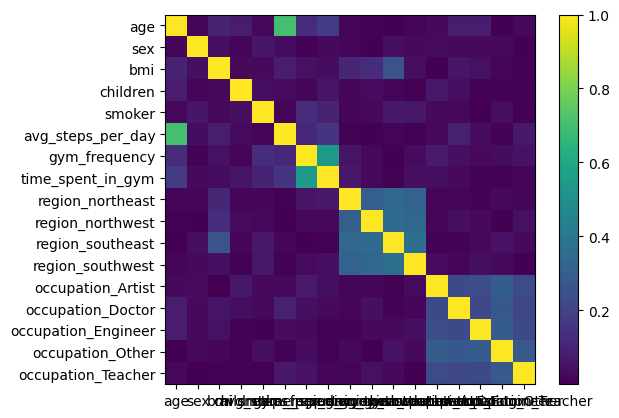

In [9]:
%matplotlib inline

plt.imshow(np.abs(corr_matrix))
plt.colorbar()
plt.xticks(range(X_train_scaled.shape[1]), X_train_scaled.columns)
plt.yticks(range(X_train_scaled.shape[1]), X_train_scaled.columns)
plt.show()

In [57]:
X_train_OLS = X_train_original.drop(['avg_steps_per_day', 'sex', 'time_spent_in_gym','occupation_Artist'], axis = 1)
X_train_OLS = X_train_OLS.astype(float)
X_train_OLSs = sm.add_constant(X_train_OLS)
multi_model = sm.OLS(y_train,X_train_OLSs).fit()

In [58]:
multi_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                    OLS                  Adj. R-squared:         0.609     
Dependent Variable:       charges              AIC:                    20751.2698
Date:                     2024-03-30 13:25     BIC:                    20815.1096
No. Observations:         1003                 Log-Likelihood:         -10363.   
Df Model:                 12                   F-statistic:            131.3     
Df Residuals:             990                  Prob (F-statistic):     4.47e-195 
R-squared:                0.614                Scale:                  5.5865e+07
---------------------------------------------------------------------------------
                       Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------
const                 8798.0844 1326.9050   6.6305 0.0000   6194.2149  11401.9539
age                    232.4786   18.2228  12.7576 0.0000    196.7189    268.2384
bmi                    353.6076   41.6706   8.4858 0.0000    271.8348    435.3805
children               497.2478  195.7352   2.5404 0.0112    113.1443    881.3513
smoker              -21876.7518  626.3711 -34.9262 0.0000 -23105.9193 -20647.5842
gym_frequency         -773.6073  222.3633  -3.4790 0.0005  -1209.9649   -337.2497
region_northeast      2673.7591  513.5877   5.2060 0.0000   1665.9135   3681.6047
region_northwest      2396.2910  515.5987   4.6476 0.0000   1384.4991   3408.0829
region_southeast      2156.3505  569.0989   3.7891 0.0002   1039.5719   3273.1291
region_southwest      1571.6838  529.7493   2.9668 0.0031    532.1233   2611.2443
occupation_Doctor      717.3756  784.7412   0.9142 0.3609   -822.5716   2257.3228
occupation_Engineer   1442.5712  768.6112   1.8769 0.0608    -65.7231   2950.8655
occupation_Other      1515.9105  706.7697   2.1448 0.0322    128.9717   2902.8493
occupation_Teacher    1926.5409  779.4972   2.4715 0.0136    396.8843   3456.1975
---------------------------------------------------------------------------------
Omnibus:               420.013        Durbin-Watson:           2.025             
Prob(Omnibus):         0.000          Jarque-Bera (JB):        1946.053          
Skew:                  1.935          Prob(JB):                0.000             
Kurtosis:              8.621          Condition No.:           189406165960347104
=================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
[2] The smallest eigenvalue is 7.31e-29. This might indicate that
there are strong multicollinearity problems or that the design
matrix is singular.
"""

In [18]:
lreg_multi = LinearRegression()
lreg_multi.fit(X_train_original, y_train)

LinearRegression()

In [21]:
lreg_multi.coef_

array([ 1.88162083e+02,  2.95202098e+02,  3.50676523e+02,  4.90316701e+02,
       -2.18224285e+04, -5.42153137e-01, -5.40780346e+02, -2.13533723e+01,
        4.16949496e+02,  2.06113712e+02, -2.25910240e+01, -6.00472184e+02,
       -1.14435139e+03, -4.48577125e+02,  2.98835846e+02,  3.89597031e+02,
        9.04495633e+02])

In [20]:
y_pred_multi = lreg_multi.predict(X_train_original)
y_pred_multi

array([6736.50207264, 9710.85307609,  992.30750957, ..., 7093.45353637,
       6542.39508699, 1818.55197366])

In [22]:
r2_score(y_train, y_pred_multi)

0.6173778761975992

In [74]:
#SGDRegressor Model 

from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state = 0, max_iter = 1000, learning_rate = 'optimal', eta0 = 0.02)
sgd.fit(X_train_scaled, y_train)

print('train r2-score: ', sgd.score(X_train_scaled, y_train))
print('validation r2-score: ', sgd.score(X_test_scaled, y_test))

train r2-score:  0.5824544182356648
validation r2-score:  0.7000140358638025


In [72]:
#invscaling scores
#train r2-score:  0.6126307445326771
#validation r2-score:  0.6942310564570345
#adaptive scores
#train r2-score:  0.617342083623151
#validation r2-score:  0.6935601912959612
#constant score
#train r2-score:  0.5824544182356648
#validation r2-score:  0.7000140358638025

In [5]:
##----------- LAB 4 ---------------------##

In [6]:
clasification_df = df
clasification_df.loc[(clasification_df['charges'] <= 4500), 'charges'] = 1
clasification_df.loc[(clasification_df['charges'] > 4500) & (clasification_df['charges'] <= 10000), 'charges'] = 2
clasification_df.loc[(clasification_df['charges'] > 10000), 'charges'] = 3

In [7]:
clasification_df['charges'].value_counts()

charges
3.0    626
2.0    400
1.0    312
Name: count, dtype: int64

In [8]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis = 1)
y = df['charges']

X_train_original, X_test_original, y_train, y_test = train_test_split(X,y, 
                                                      test_size = 0.2, random_state = 0)

scaler = MinMaxScaler()
scaler.fit(X_train_original)
X_train_scaled = scaler.transform(X_train_original)

scaler.fit(X_test_original)
X_test_scaled = scaler.transform(X_test_original)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)

In [9]:
X_test_scaled['bmi'].mean()

0.45790074188035956

In [10]:
#train a Logistic regression model
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(random_state = 0, max_iter = 200)
lreg.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=200, random_state=0)

In [11]:
print('train score:', lreg.score(X_train_scaled,y_train))
print('test score:', lreg.score(X_test_scaled, y_test))

train score: 0.8018691588785046
test score: 0.75


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, lreg.predict(X_train_scaled))

array([[220,  26,   5],
       [ 12, 225,  77],
       [ 32,  60, 413]], dtype=int64)

In [13]:
from sklearn.metrics import classification_report
target_names=['class 0', 'class 1', 'class 2']
print(classification_report(y_train, lreg.predict(X_train_scaled),target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.88      0.85       251
     class 1       0.72      0.72      0.72       314
     class 2       0.83      0.82      0.83       505

    accuracy                           0.80      1070
   macro avg       0.80      0.80      0.80      1070
weighted avg       0.80      0.80      0.80      1070



In [14]:
predict_df = pd.DataFrame({'age':[40],
'sex':[1], 'bmi':[28],
'children':[2],
'smoker':[0],
'avg_steps_per_day':[7000],
'gym_frequency':[1],
'time_spent_in_gym':[2],
'region_northeast':[0],
'region_northwest':[0],
'region_southeast':[0],
'region_southwest':[1],
'occupation_Artist':[0],
'occupation_Doctor':[0],
'occupation_Engineer':[1],
'occupation_Other':[0],
'occupation_Teacher':[0]})
scaler.fit(predict_df)
predict_df_scaled = scaler.transform(predict_df)
predict_df_scaled = pd.DataFrame(predict_df_scaled, columns = predict_df.columns)
predict_df_scaled

,age,sex,bmi,children,smoker,avg_steps_per_day,gym_frequency,time_spent_in_gym,region_northeast,region_northwest,region_southeast,region_southwest,occupation_Artist,occupation_Doctor,occupation_Engineer,occupation_Other,occupation_Teacher
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
lreg.predict_proba(predict_df_scaled)[:,1]

array([0.00052133])

In [16]:
lreg.predict(predict_df_scaled)

array([3.])

In [17]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, lreg.predict(X_test_scaled), average='micro')
recall

0.75

In [18]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, lreg.predict(X_test_scaled), average='micro')
precision

0.75

In [19]:
#new Logistic regression model for binary values
y_new_train = y_train < 3

from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(random_state = 0, max_iter = 1000)
lreg.fit(X_train_scaled,y_new_train)

LogisticRegression(max_iter=1000, random_state=0)

In [20]:
#confusion matrix for the above lreg
confusion_matrix(y_new_train, lreg.predict(X_train_scaled))

array([[408,  97],
       [ 53, 512]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

new_predict_df = pd.DataFrame(y_new_train, columns = ['Actual values'])
new_predict_df['Actual values'] = y_new_train
new_predict_df['Probability of Success'] = lreg.predict_proba(X_train_scaled)[:, 1]
new_predict_df = new_predict_df.sort_values('Probability of Success')
new_predict_df

,Actual values,Probability of Success
328,False,0.000262
843,False,0.000704
664,False,0.000733
419,False,0.000823
175,False,0.000833
...,...,...
482,True,0.978459
1244,True,0.979197
32,True,0.979545
22,True,0.979888


In [22]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(new_predict_df['Actual values'], new_predict_df['Probability of Success'])

# Calculate the precision and recall for the threshold value closest to the default threshold of 0.5.
default = np.argmin(np.abs(threshold - 0.5))
default


461

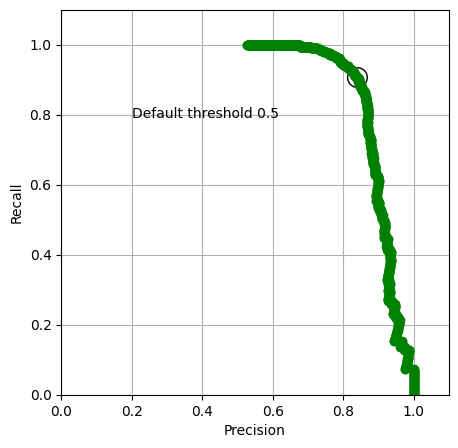

In [23]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (5,5))
plt.plot(precision, recall, 'go-')
plt.scatter(precision[default], recall[default], s = 200 , facecolors = 'None', edgecolors= 'k')
plt.annotate('Default threshold 0.5', (0.2, 0.79))
plt.xlim(0,1.1)
plt.ylim(0, 1.1)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid()

In [24]:
precision_score(y_new_train,lreg.predict(X_train_scaled))

0.8407224958949097

In [25]:
#.95 threshold
new_threshold = threshold[np.argmin(np.abs(recall - 0.95))]
new_threshold

0.36946448478721905

In [26]:
new_predict_df.loc[(new_predict_df['Probability of Success'] >= .37), 'Actual values'] = 1
new_predict_df.loc[(new_predict_df['Probability of Success'] < .37), 'Actual values'] = 0

C:\Users\Preston\AppData\Local\Temp\ipykernel_6580\3099187082.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  new_predict_df.loc[(new_predict_df['Probability of Success'] >= .37), 'Actual values'] = 1


In [27]:
new_predict_df['Actual values'] = new_predict_df['Actual values'].astype(int)

In [28]:
new = new_predict_df['Actual values']

lreg = LogisticRegression(random_state = 0, max_iter = 1000)
lreg.fit(X_train_scaled, new)

LogisticRegression(max_iter=1000, random_state=0)

In [29]:
confusion_matrix(new, lreg.predict(X_train_scaled))

array([[  9, 384],
       [  8, 669]], dtype=int64)

In [ ]:
#21 Entorpy calssifyer on desision trees

In [33]:
new_predict_df['Actual values'].value_counts()

Actual values
1    677
0    393
Name: count, dtype: int64

In [35]:
def entropy(a,b):
    if (a == 0 or b == 0):
        return 0
    else:
        return -a/(a + b) * np.log2(a/(a + b)) - b/(a + b) * np.log2(b/(a + b))

In [36]:
entropy(677,393)

0.9485683127390652

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=0)

In [41]:
dt.tree_.max_depth

15

In [42]:
print('train r2-score: ', dt.score(X_train_scaled, y_train))
print('validation r2-score: ', dt.score(X_test_scaled, y_test))

train r2-score:  1.0
validation r2-score:  0.7723880597014925


In [73]:
dt = DecisionTreeClassifier(random_state = 0, max_depth=1)
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [74]:
print('train r2-score: ', dt.score(X_train_scaled, y_train))
print('validation r2-score: ', dt.score(X_test_scaled, y_test))

train r2-score:  0.5869158878504673
validation r2-score:  0.5708955223880597


In [75]:
((dt.score(X_train_scaled, y_train)) - (dt.score(X_test_scaled, y_test)))

0.016020365462407593

In [76]:
dt = DecisionTreeClassifier(random_state = 0, max_depth=3)
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [77]:
print('DecisionTreeClassifier 3: ',(dt.score(X_train_scaled, y_train)) - (dt.score(X_test_scaled, y_test)))
print('train r2-score: ', dt.score(X_train_scaled, y_train))
print('validation r2-score: ', dt.score(X_test_scaled, y_test))

DecisionTreeClassifier 3:  0.02019110057190676
train r2-score:  0.822429906542056
validation r2-score:  0.8022388059701493


In [79]:
precision_score(y_train, dt.predict(X_train_scaled), average= 'macro')

0.8175798387993249

In [80]:
precision_score(y_test, dt.predict(X_test_scaled), average= 'macro')

0.7961565846434268

In [81]:
confusion_matrix(y_test, dt.predict(X_test_scaled))

array([[54,  7,  0],
       [14, 69,  3],
       [ 9, 20, 92]], dtype=int64)

In [82]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state= 0)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=0)

In [85]:
print('Train:', rfc.score(X_train_scaled, y_train))
print('Test:', rfc.score(X_test_scaled, y_test))

Train: 1.0
Test: 0.8134328358208955


In [87]:
train = []
test = []
index = []
for max_features in [0.2, 0.5]:
        for max_samples in [0.2, 0.5]:
            for max_depth in [1, 2]:
                rfc = RandomForestClassifier(random_state= 0, 
                                             max_samples= max_samples, 
                                             max_features= max_features,
                                             max_depth= max_depth)
                rfc.fit(X_train_scaled, y_train)
                train.append(rfc.score(X_train_scaled, y_train))
                test.append(rfc.score(X_test_scaled, y_test))
                index.append((max_features, 
                              max_samples, max_depth))

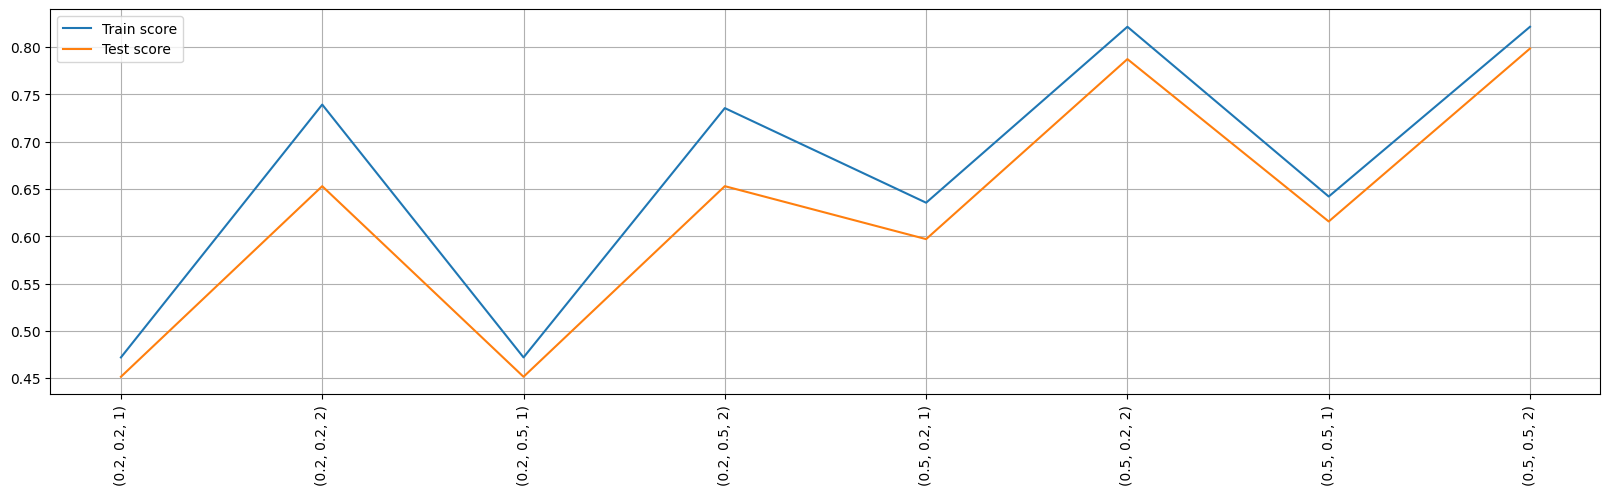

In [88]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index)), train, label = 'Train score')
plt.plot(range(len(index)), test, label = 'Test score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.grid()

In [94]:
rfc = RandomForestClassifier(random_state= 0, max_features = .5, max_samples=.2, max_depth = 2)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=2, max_features=0.5, max_samples=0.2,
                       random_state=0)

In [95]:
print('Train:', rfc.score(X_train_scaled, y_train))
print('Test:', rfc.score(X_test_scaled, y_test))

Train: 0.8214953271028037
Test: 0.7873134328358209


In [96]:
rfc = RandomForestClassifier(random_state= 0, max_features = .5, max_samples=.5, max_depth = 2)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=2, max_features=0.5, max_samples=0.5,
                       random_state=0)

In [97]:
print('Train:', rfc.score(X_train_scaled, y_train))
print('Test:', rfc.score(X_test_scaled, y_test))

Train: 0.8214953271028037
Test: 0.7985074626865671


In [98]:
rfc.feature_importances_ 

array([5.00865449e-01, 0.00000000e+00, 1.76611655e-03, 7.01619009e-03,
       2.78046911e-01, 1.17579786e-01, 3.99469267e-02, 5.33324604e-02,
       0.00000000e+00, 0.00000000e+00, 4.29472877e-04, 0.00000000e+00,
       0.00000000e+00, 1.01668736e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])